<a href="https://colab.research.google.com/github/Jose-Bruno/PDS/blob/main/Exerc%C3%ADcios_da_Aula_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Geração dos Sinais em Python

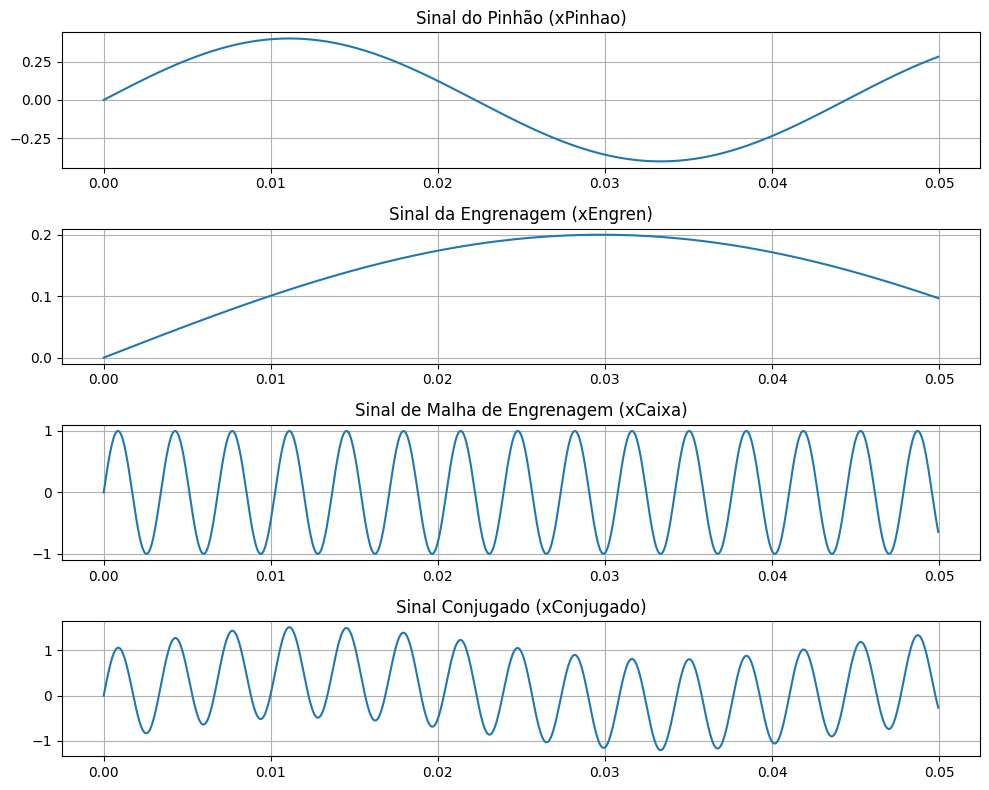

Número de pontos gerados para o sinal xConjugado: 20000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
Fs = 20000  # Taxa de amostragem (20 kHz)
t = np.linspace(0, 1, Fs)  # Vetor de tempo de 1 segundo
fPinhao = 22.5  # Frequência do pinhão (22.5 Hz)
fEngren = 8.4  # Frequência da engrenagem (8.4 Hz)
fCaixa = 292.5  # Frequência de malha de engrenagem (292.5 Hz)

# Geração dos sinais
xPinhao = 0.4 * np.sin(2 * np.pi * fPinhao * t)
xEngren = 0.2 * np.sin(2 * np.pi * fEngren * t)
xCaixa = np.sin(2 * np.pi * fCaixa * t)
xConjugado = xPinhao + xEngren + xCaixa

# Plotar os sinais (apenas um segmento curto)
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t[:1000], xPinhao[:1000])
plt.title('Sinal do Pinhão (xPinhao)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t[:1000], xEngren[:1000])
plt.title('Sinal da Engrenagem (xEngren)')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t[:1000], xCaixa[:1000])
plt.title('Sinal de Malha de Engrenagem (xCaixa)')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t[:1000], xConjugado[:1000])
plt.title('Sinal Conjugado (xConjugado)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir o número de pontos gerado
print(f"Número de pontos gerados para o sinal xConjugado: {len(xConjugado)}")


Transformada de Fourier do Sinal

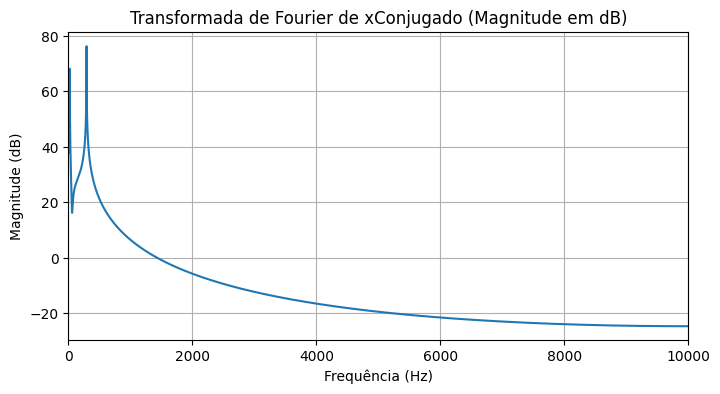

In [ ]:
from scipy.fft import fft

# Realizar a Transformada de Fourier
XConjugado = fft(xConjugado)
N = len(XConjugado)
frequencias = np.fft.fftfreq(N, 1/Fs)

# Magnitude da FFT em dB
XConjugado_dB = 20 * np.log10(np.abs(XConjugado[:N//2]))

# Plotar o espectro de frequência (apenas de 0 até Fs/2)
plt.figure(figsize=(8, 4))
plt.plot(frequencias[:N//2], XConjugado_dB)
plt.title('Transformada de Fourier de xConjugado (Magnitude em dB)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, Fs/2)
plt.show()


Criação do Sinal de Ruído com a soma do sinal de ruído

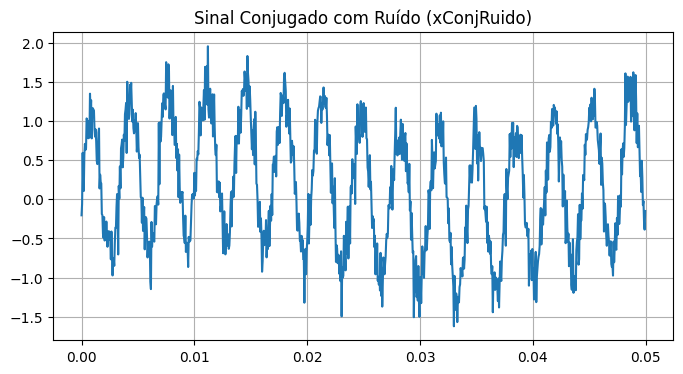

In [ ]:
# Gerar o ruído Gaussiano
ruido = 0.2 * np.random.randn(len(t))

# Adicionar o ruído ao sinal conjugado
xConjRuido = xConjugado + ruido

# Plotar o sinal com ruído
plt.figure(figsize=(8, 4))
plt.plot(t[:1000], xConjRuido[:1000])
plt.title('Sinal Conjugado com Ruído (xConjRuido)')
plt.grid(True)
plt.show()


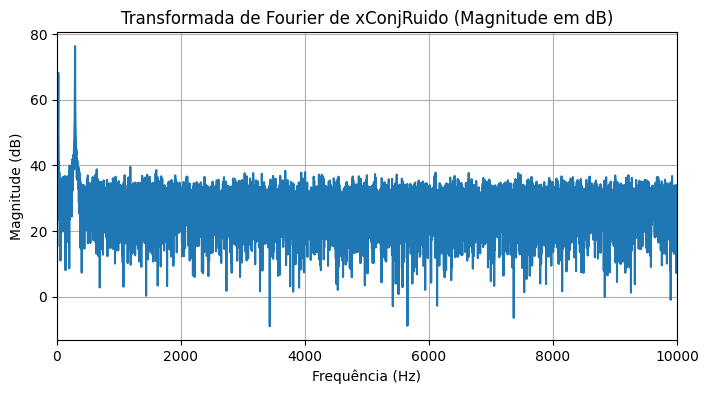

In [ ]:
# Realizar a Transformada de Fourier do sinal com ruído
XConjRuido = fft(xConjRuido)

# Magnitude da FFT em dB
XConjRuido_dB = 20 * np.log10(np.abs(XConjRuido[:N//2]))

# Plotar o espectro de frequência (0 a Fs/2)
plt.figure(figsize=(8, 4))
plt.plot(frequencias[:N//2], XConjRuido_dB)
plt.title('Transformada de Fourier de xConjRuido (Magnitude em dB)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, Fs/2)
plt.show()

Conclusões

A comparação entre estes gráficos de Fourier do sinal original (xConjugado) e do sinal ruidoso (xConjRuido) permitirá determinar se estas frequências dos elementos que constituem o sistema, ou seja, o pinhão (22,5 Hz), a engrenagem (8,4 Hz) e a engrenagem de engrenamento de frequências (292,5 Hz), ainda estão claramente presentes ou

A conclusão esperada é que, embora o ruído adicionado possa ser significativo, as frequências características dos elementos ainda devem ser identificadas, mais especificamente no espectro de Fourier, onde os picos devem se projetar sobre o ruído como resultado do fundamental.